In [42]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

from keras.backend import argmax
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.utils import to_categorical

In [43]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [44]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        b= dataset[i:(i+look_back),1]
        
        dataX.append((a,b))
        #n=round((i / 6) % 24)
        n=((i) / 6) % 24
        n=n/24
        dataY.append(n)
    return numpy.array(dataX), numpy.array(dataY)

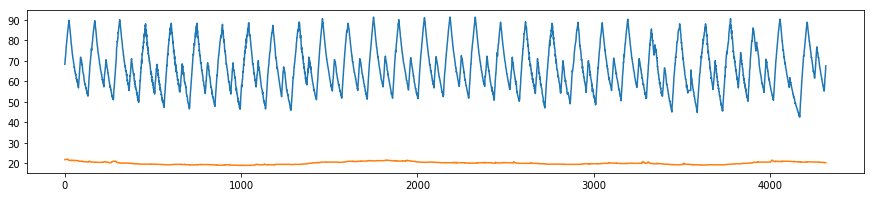

In [45]:
Pdataset = pandas.read_csv('piecstyczen.csv', usecols=[2,3], engine='python', skipfooter=3)
plt.figure(figsize=(15,3))
plt.plot(Pdataset)
plt.show()

In [46]:
Pdataset.tail(4)

,C1,C2
4313,63.50,20.3
4314,64.25,20.3
4315,66.25,20.3
4316,67.50,20.3


In [47]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(Pdataset)

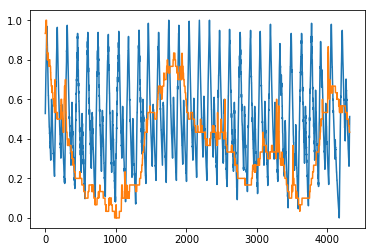

In [48]:
plt.plot(dataset)
plt.show()

In [49]:
dataset

array([[0.52820513, 0.93333333],
       [0.55384615, 0.93333333],
       [0.56923077, 0.93333333],
       ...,
       [0.44615385, 0.43333333],
       [0.48717949, 0.43333333],
       [0.51282051, 0.43333333]])

In [50]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

2892 1425


In [51]:
# reshape into X=t and Y=t+1
look_back = 60
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [52]:
trainX.shape

(2831, 2, 60)

In [53]:
# reshape input to be [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [54]:
print(trainX.shape)
#dataset.shape
print(trainY.shape)
print(train.shape)

(2831, 2, 60)
(2831,)
(2892, 2)


<Figure size 1080x216 with 0 Axes>

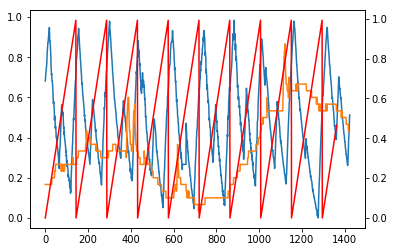

In [55]:
plt.figure(figsize=(15,3))

fig, ax1 = plt.subplots()


ax2 = ax1.twinx()
ax1.plot(test)

ax2.plot(testY,color="red")
plt.show()

In [56]:
trainY


array([0.        , 0.00694444, 0.01388889, ..., 0.63888889, 0.64583333,
       0.65277778])

In [97]:
data_dim = look_back
timesteps=2
model = Sequential()
model.add(LSTM(64, return_sequences=False,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
#model.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
#model.add(LSTM(64))  # return a single vector of dimension 32
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')


In [98]:
#trainYO = to_categorical(trainY, num_classes=25)
#testYO = to_categorical(testY, num_classes=25)

#model.compile(loss='categorical_crossentropy',
#              optimizer='rmsprop',
#              metrics=['accuracy'])


model.fit(trainX, trainY,
          batch_size=16, epochs=85, shuffle=False      )

Epoch 1/85
2831/2831 [==============================] - 1s 437us/step - loss: 0.0653
Epoch 2/85
2831/2831 [==============================] - 0s 136us/step - loss: 0.0404
Epoch 3/85
2831/2831 [==============================] - 0s 134us/step - loss: 0.0300
Epoch 4/85
2831/2831 [==============================] - 0s 136us/step - loss: 0.0238
Epoch 5/85
2831/2831 [==============================] - 0s 136us/step - loss: 0.0202
Epoch 6/85
2831/2831 [==============================] - 0s 168us/step - loss: 0.0190
Epoch 7/85
2831/2831 [==============================] - 0s 140us/step - loss: 0.0179
Epoch 8/85
2831/2831 [==============================] - 0s 145us/step - loss: 0.0172
Epoch 9/85
2831/2831 [==============================] - 0s 143us/step - loss: 0.0167
Epoch 10/85
2831/2831 [==============================] - 0s 147us/step - loss: 0.0163
Epoch 11/85
2831/2831 [==============================] - 0s 144us/step - loss: 0.0159
Epoch 12/85
2831/2831 [==============================] - 0s 144

In [99]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 64)                32000     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 32,065
Trainable params: 32,065
Non-trainable params: 0
_________________________________________________________________


In [100]:
#model.evaluate(testX, testYO)

In [101]:
score = model.evaluate(trainX, trainYO, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


ValueError: Error when checking target: expected dense_5 to have shape (1,) but got array with shape (25,)

In [102]:
# make predictions
trainPredict1 = model.predict(trainX)
testPredict1 = model.predict(testX)
trainPredict1[0]

array([0.30105218], dtype=float32)

In [103]:
#softmax(trainPredict)
trainPredict=numpy.argmax(trainPredict1,1)
testPredict=numpy.argmax(testPredict1,1)
trainPredict

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])

In [105]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict1))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict1))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 0.101 RMSE
Test Score: 0.247 RMSE


(4317, 2)


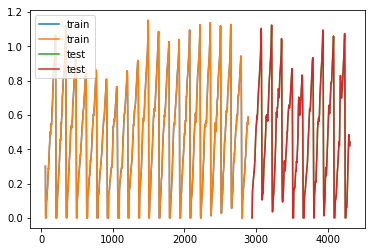

In [106]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
print(trainPredictPlot.shape)
trainPredictPlot[look_back:len(trainPredict1)+look_back, :] = trainPredict1
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)-7:len(dataset)-9, :] = testPredict1
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset),label="set")
plt.plot(trainPredictPlot,label="train")
plt.plot(testPredictPlot,label="test")
plt.legend()
plt.show()

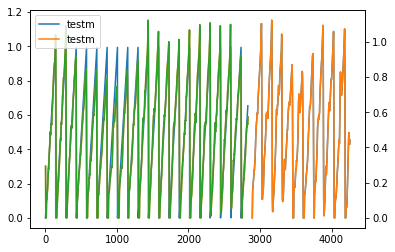

In [107]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
wws=2;
trainPredictPlot[wws:len(trainPredict1)+wws,:] = trainPredict1
wws=60
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+wws+1:len(dataset)-look_back-1, :] = testPredict1
# plot baseline and predictions

fig, ax1 = plt.subplots()


ax2 = ax1.twinx()
ax1.plot(trainY,label="set")
ax1.plot(trainPredictPlot,label="train")
ax2.plot(testPredictPlot,label="testm")
#plt.figure(figsize=(15,3))

plt.legend()
plt.show()